In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
def file_get_contents(filename):
    with open(filename) as f:
        return f.read()

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json

file_json_contents = file_get_contents("./files_parseds/ALEXIS PEDRÃO_260001087378.json")
json_data = json.loads(file_json_contents)
content_pages = [content["text"] for content in json_data["content"]]

In [65]:
stop_words = ["de","a","o","que","e","do","da","em","um","para","é", "etc","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua","ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela","até","isso","ela","entre","era","depois","sem","mesmo","aos","ter","seus","quem","nas","me","esse","eles","estão","você","tinha","foram","essa","num","nem","suas","meu","às","minha","têm","numa","pelos","elas","havia","seja","qual","será","nós","tenho","lhe","deles","essas","esses","pelas","este","fosse","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estamos","estão","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos","são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","teríamos","teriam"]
tfIdfVectorizer=TfidfVectorizer(
    max_df=0.8,
    min_df=0.2,
    stop_words=stop_words,
    use_idf=True,
    ngram_range=(1,2),
    max_features=100
)
tfIdf = tfIdfVectorizer.fit_transform(content_pages)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df_word = df.head(50)

sentences_dictionary = {}
text_database = []

for sentence, row in df_word.iterrows():
    if sentence not in stop_words:
        text_instance = {}
        text_instance['sentence'] = sentence
        text_instance['tf-idf'] = row["TF-IDF"]
        sentences_dictionary[sentence] = row["TF-IDF"]
        text_database.append(text_instance)

#print(sentences_dictionary)
print(text_database)

[{'sentence': 'aracaju', 'tf-idf': 0.5521657452151597}, {'sentence': 'pandemia', 'tf-idf': 0.4629781522182937}, {'sentence': 'durante', 'tf-idf': 0.4569288643664739}, {'sentence': 'programa', 'tf-idf': 0.2044035245717776}, {'sentence': 'toda', 'tf-idf': 0.2044035245717776}, {'sentence': 'construção', 'tf-idf': 0.1768607694101101}, {'sentence': 'vida', 'tf-idf': 0.10784005125821515}, {'sentence': 'participação popular', 'tf-idf': 0.09715814093378501}, {'sentence': 'bem', 'tf-idf': 0.09259563044365875}, {'sentence': 'famílias', 'tf-idf': 0.09259563044365875}, {'sentence': 'maioria', 'tf-idf': 0.09259563044365875}, {'sentence': 'mulheres', 'tf-idf': 0.09259563044365875}, {'sentence': 'todas', 'tf-idf': 0.08843038470505506}, {'sentence': 'todos', 'tf-idf': 0.08843038470505506}, {'sentence': 'plano', 'tf-idf': 0.08843038470505506}, {'sentence': 'sobre', 'tf-idf': 0.08459873005737334}, {'sentence': 'construir', 'tf-idf': 0.08459873005737334}, {'sentence': 'gestão', 'tf-idf': 0.08459873005737

/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [66]:
tfIdf.shape

(27, 100)

In [67]:
dataframe_texts =  pd.DataFrame(text_database)
dataframe_texts

,sentence,tf-idf
0,aracaju,0.552166
1,pandemia,0.462978
2,durante,0.456929
3,programa,0.204404
4,toda,0.204404
5,construção,0.176861
6,vida,0.107840
7,participação popular,0.097158
8,bem,0.092596
9,famílias,0.092596


In [68]:
# Imports necessários
from sklearn.cluster import KMeans
from sklearn import metrics

# Variando o número de k de 1 a 10 para analisar os valores da métrica

for k in range(2, 10):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(tfIdf)
  score = metrics.silhouette_score(tfIdf, km.labels_, metric='euclidean')
  print("Para k=%i o valor Silhoutte foi de %.4f" % (k, score))

Para k=2 o valor Silhoutte foi de 0.0965
Para k=3 o valor Silhoutte foi de 0.1020
Para k=4 o valor Silhoutte foi de 0.1001
Para k=5 o valor Silhoutte foi de 0.0730
Para k=6 o valor Silhoutte foi de 0.0873
Para k=7 o valor Silhoutte foi de 0.0780
Para k=8 o valor Silhoutte foi de 0.0882
Para k=9 o valor Silhoutte foi de 0.0793


In [69]:
km = KMeans(n_clusters=5,random_state=42)
clusters_km = km.fit_predict(tfIdf)
clusters_km

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 4, 3, 3, 4, 1, 1, 2, 3, 4, 4, 1,
       3, 3, 1, 1, 0], dtype=int32)

In [70]:
dataframe_texts['clusters_km'] = clusters_km
dataframe_texts

ValueError: Length of values (27) does not match length of index (50)

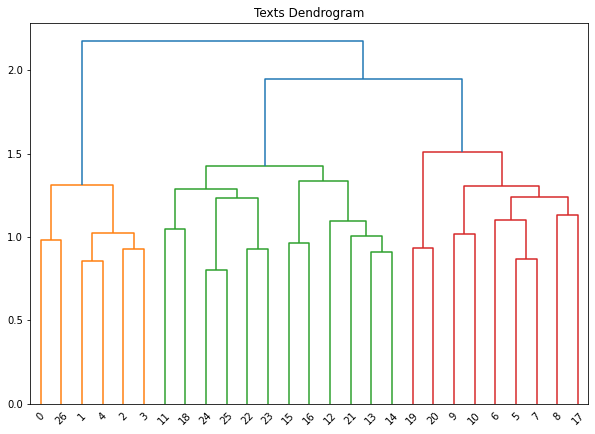

In [71]:
# Imports necessários
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Criando e plotando o dendrograma
plt.figure(figsize=(10, 7))
plt.title("Texts Dendrogram")
cluster_alg = shc.linkage(tfIdf.toarray(), method='ward',)
dend = shc.dendrogram(cluster_alg)

In [72]:
# Imports Necessários
from sklearn.cluster import AgglomerativeClustering

# Criação do Cluster
agg_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
clusters_agg = agg_cluster.fit_predict(tfIdf.toarray())
clusters_agg

array([6, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 4, 4, 4, 5, 5, 0, 1, 3, 3, 4,
       1, 1, 1, 1, 6])

In [73]:
# A variável clusters indica qual cluster cada texto foi atribuído. O código a seguir cria uma coluna 
# associando o rótulo do cluster a cada filme
dataframe_texts['cluster_agg'] = clusters_agg
dataframe_texts

ValueError: Length of values (27) does not match length of index (50)

In [74]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[ 6, 60, 29, 43, 34, 63, 70, 33, 81, 42, 89, 86, 69, 72, 82, 88,
        77, 65, 19, 96, 56, 14, 18, 64, 15, 35, 67, 10, 11, 97, 13,  9,
        23, 66, 98, 39, 85, 58, 73, 90, 44, 62, 47, 53, 49, 91, 28, 87,
        17, 61, 79, 40, 50, 68, 52, 22, 21, 54,  2, 57, 32, 92, 75, 93,
        76, 78, 51,  8, 20,  1,  4,  3,  5, 12,  7, 16, 99, 24, 48, 95,
        94, 84, 83, 80, 74, 71, 59, 55, 46, 25, 45, 41, 38, 37, 36, 31,
        30, 27, 26,  0],
       [82,  8, 97, 54, 89, 72,  7, 84, 65, 83, 69, 99, 41, 16, 80, 81,
        53, 21, 25, 73, 74, 66, 64, 51, 15, 20, 13, 36, 78, 86, 30,  2,
        50, 91,  3, 94, 52, 93, 28, 37, 38, 55, 35, 56, 40, 58, 57, 90,
         5, 34, 87, 10, 14, 92, 76,  0, 77, 22, 63,  1, 32, 42,  9, 85,
        75, 12, 17, 11, 47, 71, 45, 18, 27, 88, 24, 60,  4, 23, 67, 96,
        44, 68, 49, 95, 19, 48, 59, 61, 46, 29,  6, 62, 26, 39, 79, 98,
        70, 33, 31, 43],
       [13, 67, 42, 95, 87, 23, 59, 35,  6, 64, 44, 56, 16, 39, 93, 77,
        48, 99

In [75]:
# Criação de uma veriável com a lista de palavras que representa as colunas da matriz.
terms = tfIdfVectorizer.get_feature_names_out()

In [76]:
terms

array(['acesso', 'adolescentes', 'ambiente', 'ampliar', 'ampliação',
       'apoio', 'aracaju', 'assistência', 'atendimento', 'ações',
       'bairros', 'bem', 'centro', 'cidade', 'comunidades', 'condições',
       'conselhos', 'construir', 'construção', 'contra', 'controle',
       'crianças', 'criar', 'criação', 'cultura', 'deficiência',
       'desenvolvimento', 'direito', 'direitos', 'durante', 'educação',
       'empresas', 'escolas', 'estado', 'famílias', 'forma', 'formação',
       'fortalecer', 'fortalecimento', 'fundamental', 'garantia',
       'garantir', 'gestão', 'governo', 'grandes', 'incentivar', 'jovens',
       'junto', 'lei', 'maioria', 'medidas', 'meio', 'meio ambiente',
       'moradia', 'mulheres', 'municipais', 'municipal', 'município',
       'número', 'orçamento', 'pandemia', 'participação',
       'participação popular', 'pessoas', 'plano', 'política',
       'políticas', 'popular', 'populares', 'população', 'prefeitura',
       'prioridade', 'profissionais', 'p

In [77]:
centroids = []
# 5 foi o número de clusters que usamos para treinar o modelo do K-Means
for i in range(5): 
  list_id = order_centroids[i]
  list_terms = [terms[id] for id in list_id[:10]]
  centroids.append({'cluster': i, 'words': ', '.join(list_terms)})

df_centroids = pd.DataFrame(centroids)
df_centroids

,cluster,words
0,0,"aracaju, pandemia, durante, governo, famílias,..."
1,1,"saúde, atendimento, violência, mulheres, socia..."
2,2,"cidade, popular, gestão, transporte, sobre, cr..."
3,3,"educação, mulheres, adolescentes, jovens, trab..."
4,4,"cultura, saúde, cidade, empresas, escolas, edu..."


In [78]:
for n in range(5):
  print("Cluster %i: %s" % (n, list(df_centroids[df_centroids['cluster'] == n]['words'][:5])))
  data_selected = dataframe_texts[dataframe_texts['cluster_km'] == n]
  for index, row in data_selected.head(10).iterrows():
    print("\tFilme: %s" % row['movie'])
  print()

Cluster 0: ['aracaju, pandemia, durante, governo, famílias, pessoas, prefeitura, estado, renda, gestão']


KeyError: 'cluster_km'

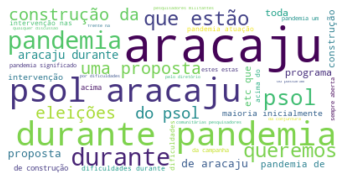

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

words_cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(sentences_dictionary)

plt.imshow(words_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()